<a href="https://colab.research.google.com/github/And2300/Trash/blob/main/plots_tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [11]:
pip install --user fonttools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
df1 = pd.read_excel('1_DSC_0025_filt.xlsx')
df2 = pd.read_excel('1_DSC_0026_filt.xlsx')
df3 = pd.read_excel('1_DSC_0027_filt.xlsx')
df4 = pd.read_excel('1_DSC_0028_filt.xlsx')

In [59]:
#df1

In [3]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 16
rcParams['axes.linewidth'] = 1.1
rcParams['axes.labelpad'] = 10.0
plot_color_cycle = cycler('color', ['000000', '0000FE', 'FE0000', '008001', 'FD8000', '8c564b', 
                                    'e377c2', '7f7f7f', 'bcbd22', '17becf'])
rcParams['axes.prop_cycle'] = plot_color_cycle
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams.update({"figure.figsize" : (10,8), #(6.8,4.8)  (12.8,4.8)
                 "figure.subplot.left" : 0.177, "figure.subplot.right" : 0.946,
                 "figure.subplot.bottom" : 0.156, "figure.subplot.top" : 0.965,
                 "axes.autolimit_mode" : "round_numbers",
                 "xtick.major.size"     : 7,#7
                 "xtick.minor.size"     : 3.5,#3.5
                 "xtick.major.width"    : 1.1,
                 "xtick.minor.width"    : 1.1,
                 "xtick.major.pad"      : 5,
                 'xtick.labelsize'      : 12, #taamaño X
                 "xtick.minor.visible" : True,
                 "ytick.major.size"     : 7,
                 "ytick.minor.size"     : 3.5,
                 "ytick.major.width"    : 1.1,
                 "ytick.minor.width"    : 1.1,
                 "ytick.major.pad"      : 5,
                 "ytick.minor.visible" : True,
                 "lines.markersize" : 10,
                 "lines.markerfacecolor" : "none",
                 "lines.markeredgewidth"  : 0.8})

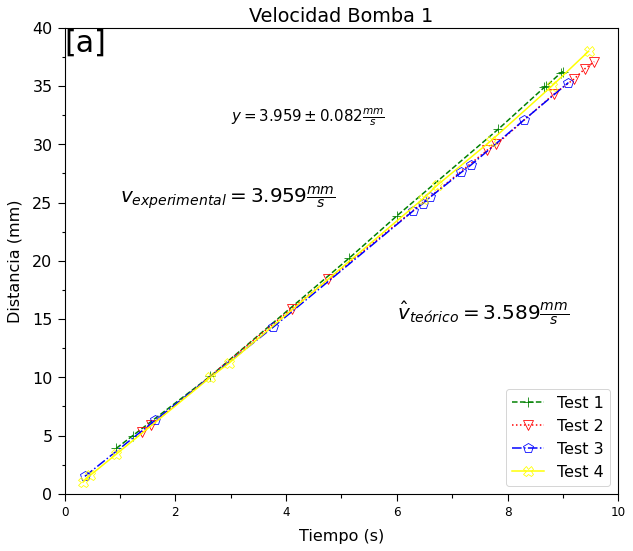

In [28]:
plt.plot(df1['VCTIME'],df1['Distance(mm)'], label="Test 1", color='green', marker='+',linestyle='dashed')
plt.plot(df2['VCTIME'],df2['Distance(mm)'], label="Test 2", color='red', marker='v',linestyle='dotted')
plt.plot(df3['VCTIME'],df3['Distance(mm)'], label="Test 3", color='blue', marker='p',linestyle='dashdot')
plt.plot(df4['VCTIME'],df4['Distance(mm)'], label="Test 4", color='yellow', marker='X',linestyle='solid')
#plt.xlim(0, 13)
#plt.ylim(2.5, None)
plt.title('Velocidad Bomba 1')
plt.xlabel(r'Tiempo (s)')
plt.ylabel(r'Distancia (mm)')
plt.legend(loc='lower right')
plt.text(3, 32, r'$y= 3.959 \pm 0.082 \frac{mm}{s}$', fontsize=15)
plt.text(1, 25, r'$v_{experimental}= 3.959 \frac{mm}{s}$', fontsize=20)
plt.text(6, 15, r'$\^v_{teórico}= 3.589 \frac{mm}{s}$', fontsize=20)
plt.annotate('[a]', xy=(0,38),fontsize=30)

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.savefig("pump1_0.075.png", dpi=1000)
plt.show()

In [6]:
import numpy as np
def concat_images(imga, imgb):
    """
    Combines two color image ndarrays side-by-side.
    """
    ha,wa = imga.shape[:2]
    hb,wb = imgb.shape[:2]
    max_height = np.max([ha, hb])
    total_width = wa+wb
    new_img = np.zeros(shape=(max_height, total_width, 3))
    new_img[:ha,:wa]=imga
    new_img[:hb,wa:wa+wb]=imgb
    return new_img

def concat_n_images(image_path_list, path_image):
    """
    Combines N color images from a list of image paths.
    """
    output = None
    for i, img_path in enumerate(image_path_list):
        img = plt.imread(img_path)[:,:,:3]
        if i==0:
            output = img
        else:
            output = concat_images(output, img)
    plt.savefig(path_image, dpi=1000)
    return output

In [7]:
images = ["pump1_0.05.png", "pump2_0.05.png"]
output = concat_n_images(images,"pump_0.05.png")

#plt.imshow(output)
#plt.show()

<Figure size 720x576 with 0 Axes>

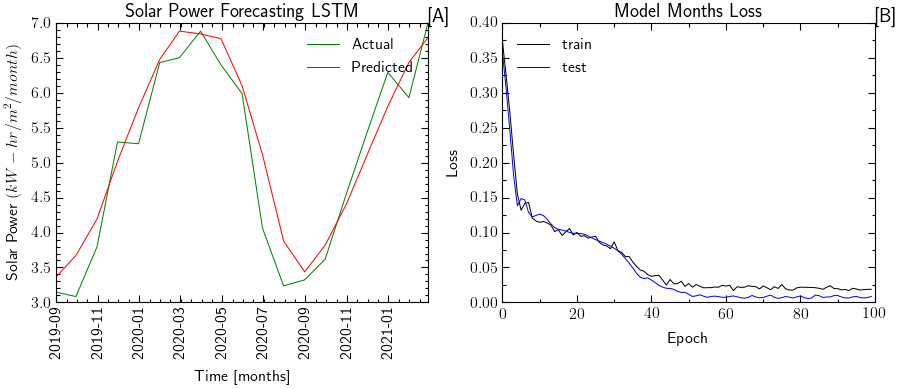

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#ax1
ax1.plot(df_m['time(UTC)'][-len(X_test):],y_test_inverse, label="Actual", color='green')
ax1.plot(df_m['time(UTC)'][-len(X_test):],y_hat_inverse, label="Predicted", color='red')
ax1.set_title('Solar Power Forecasting LSTM')
ax1.tick_params(axis='x', rotation=90)
ax1.set_xlabel('Time [months]')
ax1.set_ylabel(r'Solar Power $(kW-hr/m^2/month)$')
ax1.legend(loc='upper right') #best

#ax2
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Months Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'test'], loc='upper left')

#plt.xlim(0, 13)
#plt.ylim(2.5, None)

def get_axis_limits(ax, scale=1):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

#annotate
ax1.annotate('[A]', xy=get_axis_limits(ax1),fontsize=20, fontweight='bold')
ax2.annotate('[B]', xy=get_axis_limits(ax2),fontsize=20, fontweight='bold')


plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=2))
#plt.savefig("out.png", dpi=1000)
plt.show()

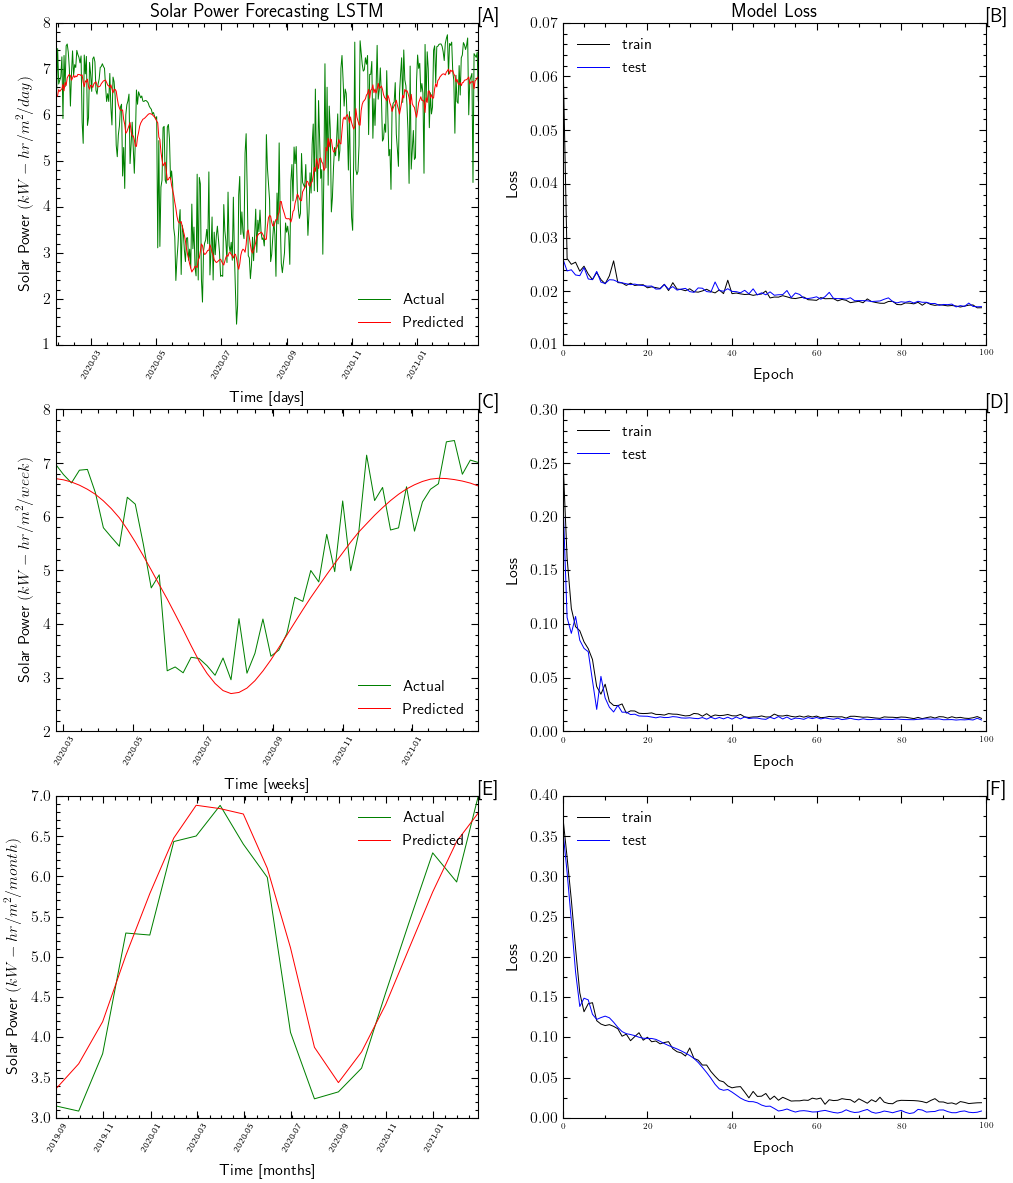

In [ ]:
#(16.8,18.8)
fig, axes = plt.subplots(3, 2)
ax1,ax2,ax3,ax4,ax5,ax6 = axes.flatten()
#ax1
ax1.plot(x_d ,y_test_inverse_d, label="Actual", color='green')
ax1.plot(x_d ,y_hat_inverse_d, label="Predicted", color='red')
ax1.set_title('Solar Power Forecasting LSTM')
ax1.tick_params(axis='x', rotation=60)
ax1.set_xlabel('Time [days]')
ax1.set_ylabel(r'Solar Power $(kW-hr/m^2/day)$')
ax1.legend(loc='lower right') #best

#ax2
ax2.plot(ld)
ax2.plot(vld)
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'test'], loc='upper left')

#ax3
ax3.plot(x_w ,y_test_inverse_w, label="Actual", color='green')
ax3.plot(x_w ,y_hat_inverse_w, label="Predicted", color='red')
#ax3.set_title('Solar Power Forecasting LSTM')
ax3.tick_params(axis='x', rotation=60)
ax3.set_xlabel('Time [weeks]')
ax3.set_ylabel(r'Solar Power $(kW-hr/m^2/week)$')
ax3.legend(loc='lower right') #best

#ax4
ax4.plot(lw)
ax4.plot(vlw)
#ax4.set_title('Model Months Loss')
ax4.set_ylabel('Loss')
ax4.set_xlabel('Epoch')
ax4.legend(['train', 'test'], loc='upper left')

#ax5
ax5.plot(df_m['time(UTC)'][-len(X_test):],y_test_inverse, label="Actual", color='green')
ax5.plot(df_m['time(UTC)'][-len(X_test):],y_hat_inverse, label="Predicted", color='red')
#ax5.set_title('Solar Power Forecasting LSTM')
ax5.tick_params(axis='x', rotation=60)
ax5.set_xlabel('Time [months]')
ax5.set_ylabel(r'Solar Power $(kW-hr/m^2/month)$')
ax5.legend(loc='upper right') #best

#ax6
ax6.plot(history.history['loss'])
ax6.plot(history.history['val_loss'])
#ax6.set_title('Model Months Loss')
ax6.set_ylabel('Loss')
ax6.set_xlabel('Epoch')
ax6.legend(['train', 'test'], loc='upper left')

#plt.xlim(0, 13)
#plt.ylim(2.5, None)

def get_axis_limits(ax, scale=1):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

#annotate
ax1.annotate('[A]', xy=get_axis_limits(ax1),fontsize=20, fontweight='bold')
ax2.annotate('[B]', xy=get_axis_limits(ax2),fontsize=20, fontweight='bold')
ax3.annotate('[C]', xy=get_axis_limits(ax3),fontsize=20, fontweight='bold')
ax4.annotate('[D]', xy=get_axis_limits(ax4),fontsize=20, fontweight='bold')
ax5.annotate('[E]', xy=get_axis_limits(ax5),fontsize=20, fontweight='bold')
ax6.annotate('[F]', xy=get_axis_limits(ax6),fontsize=20, fontweight='bold')

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.savefig("preds.png", dpi=1000)
plt.show()